In [1]:
from utils import *

import pandas as pd
import numpy as np
from pycaret.classification import *

In [2]:
df6 = pd.read_pickle("./pickles_temp/V4_4.pkl")
# Solo tenemos missigns en contruction year

-------------- CONSTRUCTION_YEAR ---------------
count    38691.000000
mean      1996.814686
std         12.472045
min       1960.000000
25%       1987.000000
50%       2000.000000
75%       2008.000000
max       2013.000000
Name: construction_year, dtype: float64
construction_year
Atípicos inferiores: 0.0
Atípicos superiores: 0.0
% valores atípicos: 0.0
missings:  20709
ceros:  0


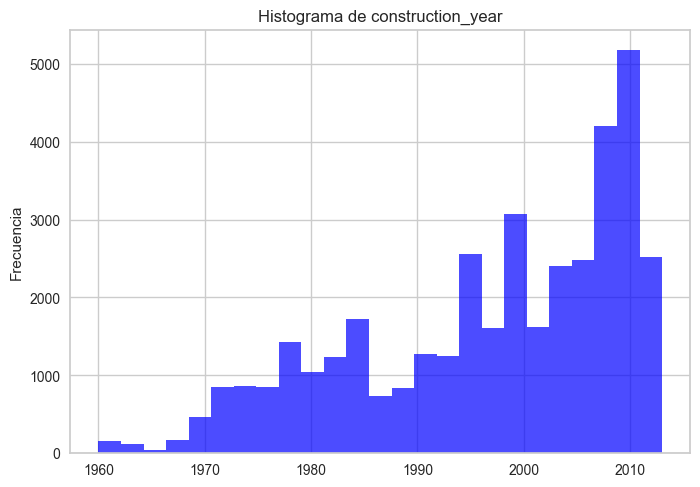

---------------------------------------------


In [3]:
descripcion_numerica(df6, 'construction_year')

In [4]:
lista_de_columnas = df6.columns.tolist()
lista_de_columnas

['id',
 'amount_tsh',
 'funder',
 'gps_height',
 'installer',
 'longitude',
 'latitude',
 'wpt_name',
 'num_private',
 'basin',
 'subvillage',
 'region',
 'region_code',
 'district_code',
 'lga',
 'ward',
 'population',
 'public_meeting',
 'scheme_management',
 'permit',
 'construction_year',
 'extraction_type_class',
 'management_group',
 'payment_type',
 'quality_group',
 'quantity',
 'source_type',
 'source_class',
 'waterpoint_type',
 'status_group',
 'year_recorded']

In [5]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   funder                 59400 non-null  object 
 3   gps_height             59400 non-null  float64
 4   installer              59400 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59400 non-null  object 
 8   num_private            59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  subvillage             59400 non-null  object 
 11  region                 59400 non-null  object 
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga                    59400 non-null  object 
 15  wa

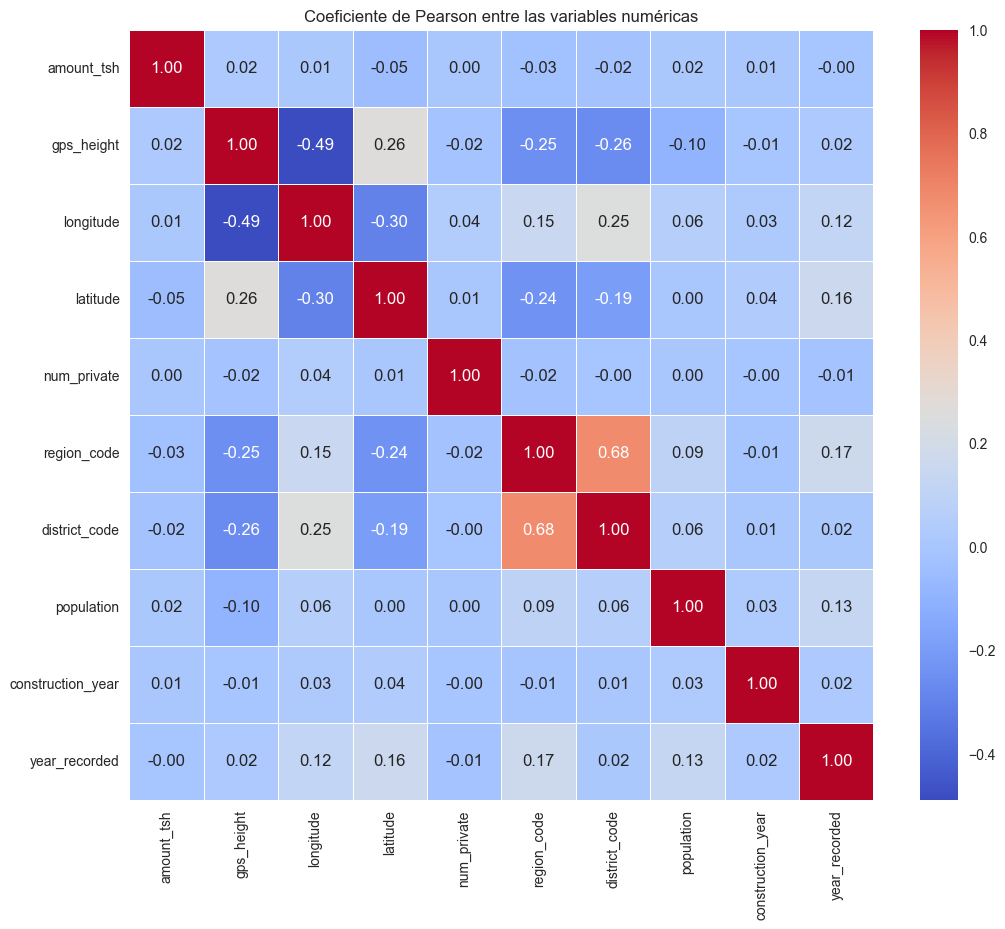

In [6]:
import matplotlib.pyplot as plt
# Fuente https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
numeric_columns = ['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 
                   'region_code', 'district_code', 'population', 'construction_year', 
                   'year_recorded']
correlation_matrix = df6[numeric_columns].corr()
# Crear un mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Coeficiente de Pearson entre las variables numéricas')
plt.show()

In [7]:
# Voy a añadir la variable target con el label encoder a 0, 1 y 2

df6_target_cambiado = df6.copy()
df6_target_cambiado['status_group'].replace(('functional', 'functional needs repair', 'non functional'), (2, 1, 0), inplace = True)
df6_target_cambiado['status_group'].head(4)

0    2
1    2
2    2
3    0
Name: status_group, dtype: int64

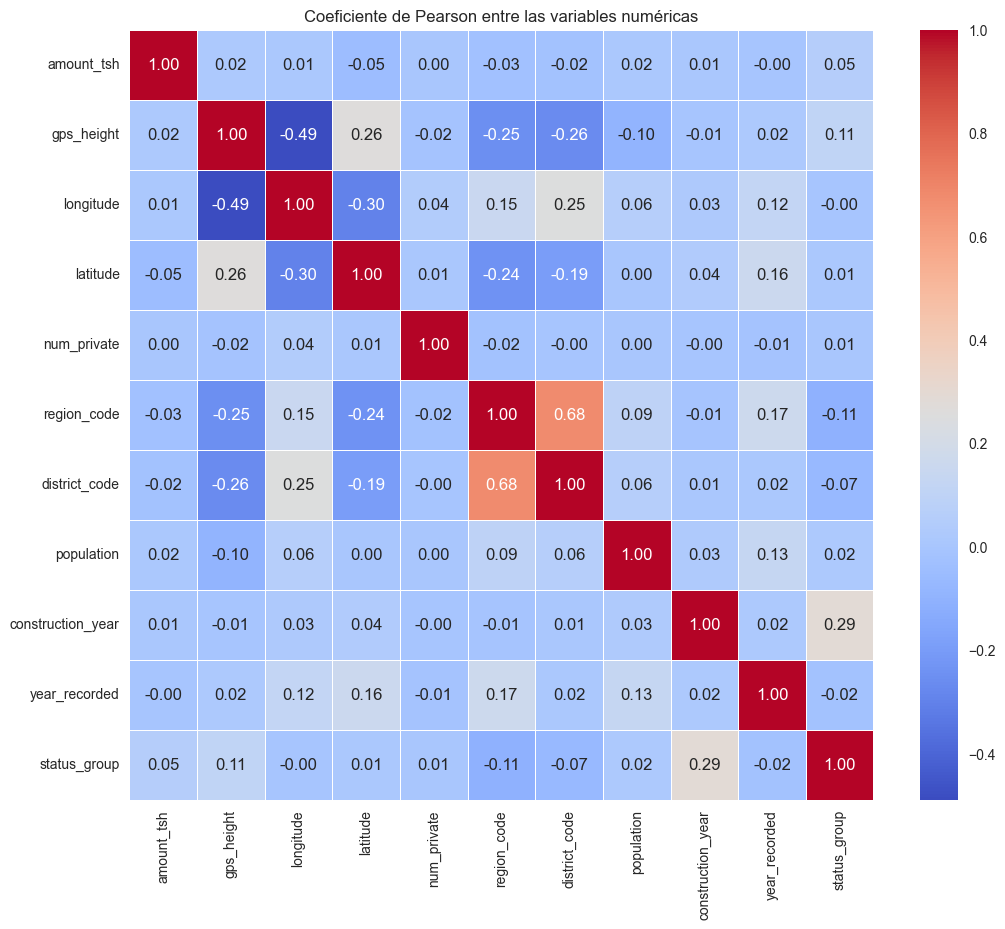

In [8]:
numeric_columns = ['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 
                   'region_code', 'district_code', 'population', 'construction_year', 
                   'year_recorded', 'status_group']
correlation_matrix = df6_target_cambiado[numeric_columns].corr()
# Crear un mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Coeficiente de Pearson entre las variables numéricas')
plt.show()

# Vemos que construction es la variable numérica que más correlación tiene con la variable objetivo. 
# Es muy importante predecirla correctamente, no debemos imputarla aleatoriamente

In [9]:
pd.set_option('display.max_columns', None) # Para ver todas las columns al hacer head

# Voy a convertir Contruction_year a categorica. 
def numeric_to_categoric(df, col, bins=10): # no testada
    # Crear contenedores y etiquetas
    cut_labels = [f"Categoría_{i}" for i in range(1, bins+1)]
    # Aplicar pd.cut() para convertir la columna numérica en categórica
    df[col + '_categoric'] = pd.cut(df[col], bins=bins, labels=cut_labels)

numeric_to_categoric(df6_target_cambiado, 'construction_year', bins = round(df6_target_cambiado['construction_year'].max() - df6_target_cambiado['construction_year'].min()))
df6_target_cambiado.head()

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity,source_type,source_class,waterpoint_type,status_group,year_recorded,construction_year_categoric
0,69572,6000.0,Roman,1390.0,Roman,34.938093,-9.856322,XEgV,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,VWC,False,1999.0,gravity,user-group,annually,good,enough,spring,groundwater,communal standpipe,2,2011,Categoría_39
1,8776,0.0,Grumeti,1399.0,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,True,Other,True,2010.0,gravity,user-group,never pay,good,insufficient,rainwater harvesting,surface,communal standpipe,2,2013,Categoría_50
2,34310,25.0,Lottery Club,686.0,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,VWC,True,2009.0,gravity,user-group,per bucket,good,enough,dam,surface,communal standpipe multiple,2,2013,Categoría_49
3,67743,0.0,Unicef,263.0,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,VWC,True,1986.0,submersible,user-group,never pay,good,dry,borehole,groundwater,communal standpipe multiple,0,2013,Categoría_26
4,19728,0.0,Action In A,1527.0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,Other,True,NaN,gravity,other/unknown,never pay,good,seasonal,rainwater harvesting,surface,communal standpipe,2,2011,NaN


In [10]:
# Intento hacer un heatmap de variables categóricas similar al anterior. Sale mal. Me devuelve en rojo el siguiente error:
    # The Kernel crashed while executing code in the current cell or a previous cell. 
    # Please review the code in the cell(s) to identify a possible cause of the failure. 
    # Click here for more info. 
    # View Jupyter log for further details.
"""
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

def cramers_v(var1, var2):
    # Convertir las variables a tipo de datos de categoría si no lo son
    if not pd.api.types.is_categorical_dtype(var1):
        var1 = var1.astype('category')
    if not pd.api.types.is_categorical_dtype(var2):
        var2 = var2.astype('category')
    
    # Crear la tabla de contingencia
    contingency_table = pd.crosstab(var1, var2)
    
    # Calcular el coeficiente de contingencia de Cramer
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    cramers_v = np.sqrt(phi2 / min((k-1), (r-1)))
    
    return cramers_v

def v_cramer_dos_col(df, col, target):
    df_filtered = df.loc[df[col].notnull()]  # Filtrar valores no nulos
    correlation_col = cramers_v(df_filtered[col], df_filtered[target])
    return correlation_col

# Crear una lista con todas las variables categóricas
categorical_columns = df6.select_dtypes(include=['object']).columns.tolist()

# Calcular la matriz de correlación de Cramer
correlation_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)
for col1 in categorical_columns:
    for col2 in categorical_columns:
        correlation_matrix.loc[col1, col2] = v_cramer_dos_col(df6, col1, col2)

# Visualizar la matriz de correlación utilizando un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix.astype(float), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlación entre variables categóricas (coeficiente de Cramer)')
plt.show()
"""

'\nimport numpy as np\nimport pandas as pd\nimport seaborn as sns\nimport matplotlib.pyplot as plt\nfrom scipy.stats import chi2_contingency\n\ndef cramers_v(var1, var2):\n    # Convertir las variables a tipo de datos de categoría si no lo son\n    if not pd.api.types.is_categorical_dtype(var1):\n        var1 = var1.astype(\'category\')\n    if not pd.api.types.is_categorical_dtype(var2):\n        var2 = var2.astype(\'category\')\n    \n    # Crear la tabla de contingencia\n    contingency_table = pd.crosstab(var1, var2)\n    \n    # Calcular el coeficiente de contingencia de Cramer\n    chi2, _, _, _ = chi2_contingency(contingency_table)\n    n = contingency_table.sum().sum()\n    phi2 = chi2 / n\n    r, k = contingency_table.shape\n    cramers_v = np.sqrt(phi2 / min((k-1), (r-1)))\n    \n    return cramers_v\n\ndef v_cramer_dos_col(df, col, target):\n    df_filtered = df.loc[df[col].notnull()]  # Filtrar valores no nulos\n    correlation_col = cramers_v(df_filtered[col], df_filtered[

In [11]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   funder                 59400 non-null  object 
 3   gps_height             59400 non-null  float64
 4   installer              59400 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59400 non-null  object 
 8   num_private            59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  subvillage             59400 non-null  object 
 11  region                 59400 non-null  object 
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga                    59400 non-null  object 
 15  wa

In [12]:
# Calculo la v-Cramer de la variable que estamos buscando con el resto de columnas categoricas
from scipy.stats import chi2_contingency

def cramers_v(var1, var2):
    # Convertir las variables a tipo de datos de categoría si no lo son
    if not pd.api.types.is_categorical_dtype(var1):
        var1 = var1.astype('category')
    if not pd.api.types.is_categorical_dtype(var2):
        var2 = var2.astype('category')
    # Crear la tabla de contingencia
    contingency_table = pd.crosstab(var1, var2)
    # Calcular el coeficiente de contingencia de Cramer
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    cramers_v = np.sqrt(phi2 / min((k-1), (r-1)))
    return cramers_v
def v_cramer_dos_col(df, col, target):
    df_filtered = df.loc[(df[col] != np.nan)]
    correlation_col = cramers_v(df_filtered[col], df_filtered[target])
    return (correlation_col)

lista_de_columnas = ['funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region', 'lga', 
    'ward', 'public_meeting', 'scheme_management', 'permit', 'extraction_type_class', 
    'management_group', 'payment_type', 'quality_group', 'quantity', 'source_type', 'construction_year',
     'source_class', 'waterpoint_type', 'status_group']

for columna in lista_de_columnas:
    #if df6[columna].dtype == 'object':
    print("vCramer con -public_meeting-", columna, round(v_cramer_dos_col(df6, columna, 'construction_year'), 2))

# Vemos que los que más se correlacionan son wpt_name, subvillage y subvillage, que son datos que tienen que ver con la localización.

vCramer con -public_meeting- funder 0.43
vCramer con -public_meeting- installer 0.43
vCramer con -public_meeting- wpt_name 0.86
vCramer con -public_meeting- basin 0.23
vCramer con -public_meeting- subvillage 0.74
vCramer con -public_meeting- region 0.24
vCramer con -public_meeting- lga 0.24
vCramer con -public_meeting- ward 0.55
vCramer con -public_meeting- public_meeting 0.16
vCramer con -public_meeting- scheme_management 0.19
vCramer con -public_meeting- permit 0.18
vCramer con -public_meeting- extraction_type_class 0.19
vCramer con -public_meeting- management_group 0.14
vCramer con -public_meeting- payment_type 0.2
vCramer con -public_meeting- quality_group 0.13
vCramer con -public_meeting- quantity 0.18
vCramer con -public_meeting- source_type 0.21
vCramer con -public_meeting- construction_year 1.0
vCramer con -public_meeting- source_class 0.22
vCramer con -public_meeting- waterpoint_type 0.17
vCramer con -public_meeting- status_group 0.23


Lo siguiente que hago, sonaba bien. Se trataba de predecir construction year utilizando (entre otras) la variable objetivo. 

El problema surgirá más adelante cuando la variable objetivo se necesitará así misma para predecirse

En el V4.6 voy a recuperar el último pickel e imputar contruction year

In [13]:
#   Todo apunta a que ciertas zonas del pais se construyeron en ciertas épocas. La correlación es mucho mayor entre estas tres.
#   Nuestra estrategia será:
#   1- aislar esas 3 columas (incluyendo id, construction_year, status_group)
#   2- aplicar label_encoder simple a todo
#   3- Hallar por random_forest el año de construcción
df6_construction_year = df6.copy()
df6_construction_year = df6_construction_year[['id', 'wpt_name', 'subvillage', 'ward', 'construction_year', 'status_group']]
df6_construction_year

,id,wpt_name,subvillage,ward,construction_year,status_group
0,69572,XEgV,Mnyusi B,Mundindi,1999.0,functional
1,8776,Zahanati,Nyamara,Natta,2010.0,functional
2,34310,Kwa Mahundi,Majengo,Ngorika,2009.0,functional
3,67743,Zahanati Ya Nanyumbu,Mahakamani,Nanyumbu,1986.0,non functional
4,19728,Shuleni,Kyanyamisa,Nyakasimbi,NaN,functional
...,...,...,...,...,...,...
59395,60739,Area Three Namba 27,Kiduruni,Masama Magharibi,1999.0,functional
59396,27263,Kwa Yahona Kuvala,Igumbilo,Ikondo,1996.0,functional
59397,37057,Mashine,Madungulu,Chimala,NaN,functional
59398,31282,Mshoro,Mwinyi,Mvumi Makulu,NaN,functional


In [14]:
# Dividimos el df entre los que tienen missings y los que no
df6_construction_year_sin_missings = df6_construction_year.copy()
df6_construction_year_solo_missings = df6_construction_year.copy()
df6_construction_year_solo_missings = df6_construction_year_solo_missings[df6_construction_year_solo_missings['construction_year'].isna()]
df6_construction_year_sin_missings = df6_construction_year.dropna(subset=['construction_year'])
df6_construction_year_solo_missings

,id,wpt_name,subvillage,ward,construction_year,status_group
4,19728,Shuleni,Kyanyamisa,Nyakasimbi,NaN,functional
6,19816,Kwa Ngomho,Ishinabulandi,Samuye,NaN,non functional
7,54551,Tushirikiane,Nyawishi Center,Chambo,NaN,non functional
8,53934,Kwa Ramadhan Musa,Imalauduki,Itetemia,NaN,non functional
9,46144,Kwapeto,Mkonomre,Kaisho,NaN,functional
...,...,...,...,...,...,...
59384,72148,Chamkube,Songambele,Nyamiyaga,NaN,non functional
59392,40607,Benard Charles,Mbuyuni A,Mbuyuni,NaN,non functional
59393,48348,Kwa Peter,Masanga,Igunga,NaN,functional
59397,37057,Mashine,Madungulu,Chimala,NaN,functional


In [15]:
df6_construction_year_sin_missings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38691 entries, 0 to 59399
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 38691 non-null  int64  
 1   wpt_name           38691 non-null  object 
 2   subvillage         38691 non-null  object 
 3   ward               38691 non-null  object 
 4   construction_year  38691 non-null  float64
 5   status_group       38691 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 2.1+ MB


In [16]:
# Aplicamos label_encoder a los objects
from sklearn.preprocessing import *
variables_categoricas = ['wpt_name', 'subvillage', 'ward', 'status_group']

le = LabelEncoder()
df6_no_missings = df6_construction_year_sin_missings.copy()
for variable in variables_categoricas:
    df6_no_missings[variable] = le.fit_transform(df6_no_missings[variable])
df6_no_missings

,id,wpt_name,subvillage,ward,construction_year,status_group
0,69572,26223,7652,926,1999.0,0
1,8776,26404,9937,1025,2010.0,0
2,34310,10915,5580,1051,2009.0,0
3,67743,26472,5510,1021,1986.0,2
5,9944,25506,7656,850,2009.0,0
...,...,...,...,...,...,...
59391,44885,5158,5992,641,1967.0,2
59394,11164,1788,4040,118,2007.0,2
59395,60739,933,2977,661,1999.0,0
59396,27263,17892,1635,190,1996.0,0


In [17]:
model_setup = setup(data=df6_no_missings, 
                    target = 'construction_year', 
                    session_id=1, 
                    )

,Description,Value
0,Session id,1
1,Target,construction_year
2,Target type,Multiclass
3,Target mapping,"1960.0: 0, 1961.0: 1, 1962.0: 2, 1963.0: 3, 1964.0: 4, 1965.0: 5, 1966.0: 6, 1967.0: 7, 1968.0: 8, 1969.0: 9, 1970.0: 10, 1971.0: 11, 1972.0: 12, 1973.0: 13, 1974.0: 14, 1975.0: 15, 1976.0: 16, 1977.0: 17, 1978.0: 18, 1979.0: 19, 1980.0: 20, 1981.0: 21, 1982.0: 22, 1983.0: 23, 1984.0: 24, 1985.0: 25, 1986.0: 26, 1987.0: 27, 1988.0: 28, 1989.0: 29, 1990.0: 30, 1991.0: 31, 1992.0: 32, 1993.0: 33, 1994.0: 34, 1995.0: 35, 1996.0: 36, 1997.0: 37, 1998.0: 38, 1999.0: 39, 2000.0: 40, 2001.0: 41, 2002.0: 42, 2003.0: 43, 2004.0: 44, 2005.0: 45, 2006.0: 46, 2007.0: 47, 2008.0: 48, 2009.0: 49, 2010.0: 50, 2011.0: 51, 2012.0: 52, 2013.0: 53"
4,Original data shape,"(38691, 6)"
5,Transformed data shape,"(38691, 6)"
6,Transformed train set shape,"(27083, 6)"
7,Transformed test set shape,"(11608, 6)"
8,Numeric features,5
9,Preprocess,True


In [18]:
# 17' gana dt: Decision Tree Classifier con:
# Model	                           Accuraccy AUC    Recall	Prec.	F1	    Kappa	MCC	    TT(Sec)
# dt	Decision Tree Classifier   0.4013    0.0000	0.4013	0.4036	0.4007	0.3805	0.3806	0.3100

if 0:
    best_model = compare_models()
else:
    best_model = create_model('dt') # Al hacer esto hay que tener cuidado con qué módulo de la libreria importas


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3950,0.0000,0.3950,0.3968,0.3944,0.3738,0.3739
1,0.4005,0.0000,0.4005,0.4022,0.4000,0.3797,0.3797
2,0.4175,0.0000,0.4175,0.4178,0.4164,0.3975,0.3976
3,0.3840,0.0000,0.3840,0.3839,0.3822,0.3623,0.3624
4,0.3973,0.0000,0.3973,0.4032,0.3986,0.3765,0.3766
5,0.4021,0.0000,0.4021,0.4062,0.4022,0.3818,0.3819
6,0.3984,0.0000,0.3984,0.4000,0.3978,0.3778,0.3779
7,0.4025,0.0000,0.4025,0.4064,0.4019,0.3815,0.3816
8,0.4014,0.0000,0.4014,0.4058,0.4015,0.3808,0.3809


In [19]:
df6_construction_year_solo_missings

,id,wpt_name,subvillage,ward,construction_year,status_group
4,19728,Shuleni,Kyanyamisa,Nyakasimbi,NaN,functional
6,19816,Kwa Ngomho,Ishinabulandi,Samuye,NaN,non functional
7,54551,Tushirikiane,Nyawishi Center,Chambo,NaN,non functional
8,53934,Kwa Ramadhan Musa,Imalauduki,Itetemia,NaN,non functional
9,46144,Kwapeto,Mkonomre,Kaisho,NaN,functional
...,...,...,...,...,...,...
59384,72148,Chamkube,Songambele,Nyamiyaga,NaN,non functional
59392,40607,Benard Charles,Mbuyuni A,Mbuyuni,NaN,non functional
59393,48348,Kwa Peter,Masanga,Igunga,NaN,functional
59397,37057,Mashine,Madungulu,Chimala,NaN,functional


In [20]:
variables_categoricas

['wpt_name', 'subvillage', 'ward', 'status_group']

In [21]:
# Obtenemos una predicción pobre. 
# Voy a ver si ha imputado todo al dato mayoritario

# Obtengo las predicciones
df6_construction_year_solo_missings_copy = df6_construction_year_solo_missings.copy()
le = LabelEncoder()
for variable in variables_categoricas:
    df6_construction_year_solo_missings_copy[variable] = le.fit_transform(df6_construction_year_solo_missings_copy[variable])
df6_construction_year_solo_missings_copy.head(10)



,id,wpt_name,subvillage,ward,construction_year,status_group
4,19728,13347,3614,842,NaN,0
6,19816,7382,2126,921,NaN,2
7,54551,13799,7088,88,NaN,2
8,53934,7664,1881,252,NaN,2
9,46144,8831,4823,298,NaN,0
12,36957,12300,6489,64,NaN,0
14,53752,10710,5307,819,NaN,0
21,6091,10654,1338,204,NaN,0
27,20145,8954,853,833,NaN,0
30,46804,11702,2826,122,NaN,0


In [22]:
df6_construction_year_solo_missings_copy2 = df6_construction_year_solo_missings_copy.drop('construction_year', axis=1)


In [23]:
df6_construction_year_solo_missings_copy2 = predict_model(best_model, data=df6_construction_year_solo_missings_copy2)
df6_construction_year_solo_missings_copy2
# Desconfio de una prediction_score de 1.0

,id,wpt_name,subvillage,ward,status_group,prediction_label,prediction_score
4,19728,13347,3614,842,0,2000,1.0
6,19816,7382,2126,921,2,1975,1.0
7,54551,13799,7088,88,2,1978,1.0
8,53934,7664,1881,252,2,1998,1.0
9,46144,8831,4823,298,0,2009,1.0
...,...,...,...,...,...,...,...
59384,72148,773,7764,855,2,1985,1.0
59392,40607,331,4524,597,2,2007,1.0
59393,48348,7598,4297,179,0,2009,1.0
59397,37057,9745,3975,107,0,2009,1.0


In [24]:
descripcion_categorica(df6_construction_year_solo_missings_copy2, 'prediction_label')

la columna no es de tipo objeto
la columna es de tipo  int32


In [25]:
df6_construction_year_solo_missings_copy2.dtypes

id                    int32
wpt_name              int32
subvillage            int32
ward                  int32
status_group           int8
prediction_label      int32
prediction_score    float64
dtype: object

-------------- PREDICTION_LABEL ---------------
count    20709.000000
mean      1995.747984
std         12.745245
min       1960.000000
25%       1986.000000
50%       1999.000000
75%       2007.000000
max       2013.000000
Name: prediction_label, dtype: float64
prediction_label
Atípicos inferiores: 0.0
Atípicos superiores: 0.0
% valores atípicos: 0.0
missings:  0
ceros:  0


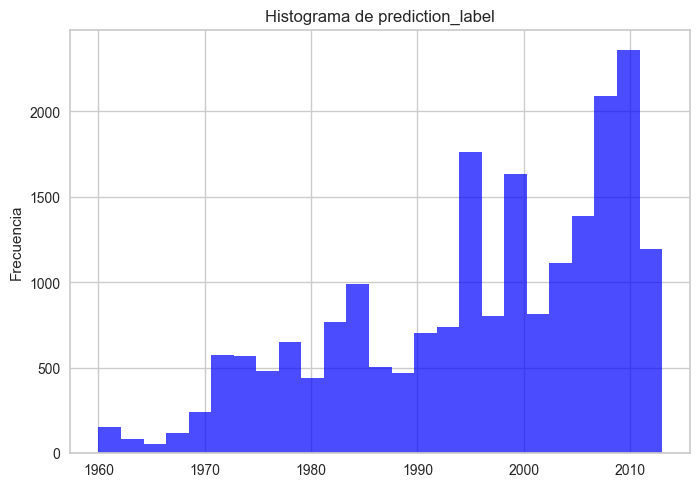

---------------------------------------------


In [26]:
descripcion_numerica(df6_construction_year_solo_missings_copy2, 'prediction_label')

-------------- CONSTRUCTION_YEAR ---------------
count    38691.000000
mean      1996.814686
std         12.472045
min       1960.000000
25%       1987.000000
50%       2000.000000
75%       2008.000000
max       2013.000000
Name: construction_year, dtype: float64
construction_year
Atípicos inferiores: 0.0
Atípicos superiores: 0.0
% valores atípicos: 0.0
missings:  20709
ceros:  0


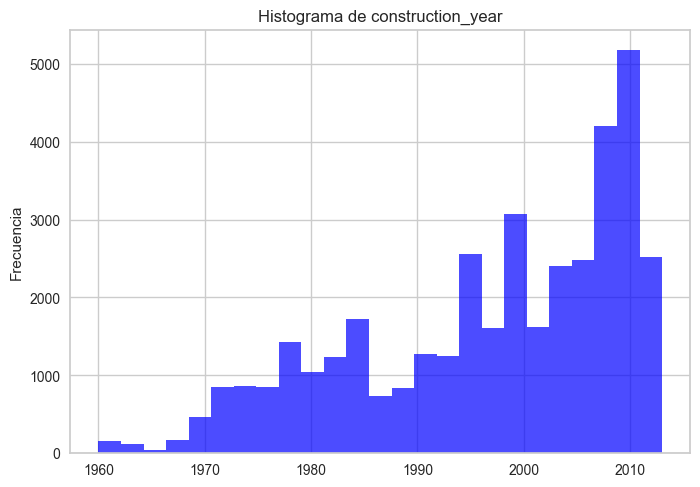

---------------------------------------------


In [27]:
# Esta proporción se parece mucho a la original. Me la quedo como válida
descripcion_numerica(df6, 'construction_year')


In [28]:
df6_construction_year_solo_missings_copy2['prediction_label']
df6_construction_year_solo_missings_copy2 = df6_construction_year_solo_missings_copy2.rename(columns={'prediction_label': 'construction_year'})
df6_construction_year_solo_missings_copy2.head()

,id,wpt_name,subvillage,ward,status_group,construction_year,prediction_score
4,19728,13347,3614,842,0,2000,1.0
6,19816,7382,2126,921,2,1975,1.0
7,54551,13799,7088,88,2,1978,1.0
8,53934,7664,1881,252,2,1998,1.0
9,46144,8831,4823,298,0,2009,1.0


In [29]:
df6_construction_year_sin_missings.head()

,id,wpt_name,subvillage,ward,construction_year,status_group
0,69572,XEgV,Mnyusi B,Mundindi,1999.0,functional
1,8776,Zahanati,Nyamara,Natta,2010.0,functional
2,34310,Kwa Mahundi,Majengo,Ngorika,2009.0,functional
3,67743,Zahanati Ya Nanyumbu,Mahakamani,Nanyumbu,1986.0,non functional
5,9944,Tajiri,Moa/Mwereme,Moa,2009.0,functional


In [30]:
# Añadimos los registros 
df6_construction_year_sin_missings = df6_construction_year_sin_missings.drop(['wpt_name', 'subvillage', 'status_group', 'ward'], axis = 1)
df6_construction_year_sin_missings.head(12)

,id,construction_year
0,69572,1999.0
1,8776,2010.0
2,34310,2009.0
3,67743,1986.0
5,9944,2009.0
10,49056,2011.0
11,50409,1987.0
13,50495,2009.0
15,61848,1991.0
16,48451,1978.0


In [31]:
df6_construction_year_solo_missings_copy2  = df6_construction_year_solo_missings_copy2.drop(['wpt_name', 'subvillage', 'status_group', 'ward', 'prediction_score'], axis = 1)
df6_construction_year_solo_missings_copy2

,id,construction_year
4,19728,2000
6,19816,1975
7,54551,1978
8,53934,1998
9,46144,2009
...,...,...
59384,72148,1985
59392,40607,2007
59393,48348,2009
59397,37057,2009


In [32]:
df6_construction_year_solo_missings_copy2.info()
df6_construction_year_sin_missings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20709 entries, 4 to 59398
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 20709 non-null  int32
 1   construction_year  20709 non-null  int32
dtypes: int32(2)
memory usage: 839.6 KB
<class 'pandas.core.frame.DataFrame'>
Index: 38691 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 38691 non-null  int64  
 1   construction_year  38691 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.9 MB


In [33]:
# Lo convierto al mismo tipo de dato para que no de problemas al hacer concat
df6_construction_year_sin_missings['construction_year'] = df6_construction_year_sin_missings['construction_year'].astype('int32')


In [34]:
df6_construction_year_solo_missings_copy2.info()
df6_construction_year_sin_missings.info()
df6.info()
# parece que también tengo que cambiar id a in64 para que no problemas luego

<class 'pandas.core.frame.DataFrame'>
Index: 20709 entries, 4 to 59398
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 20709 non-null  int32
 1   construction_year  20709 non-null  int32
dtypes: int32(2)
memory usage: 839.6 KB
<class 'pandas.core.frame.DataFrame'>
Index: 38691 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 38691 non-null  int64
 1   construction_year  38691 non-null  int32
dtypes: int32(1), int64(1)
memory usage: 1.7 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   funder          

In [35]:
df6_construction_year_solo_missings_copy2['id'] = df6_construction_year_solo_missings_copy2['id'].astype('int64')
df6_construction_year_solo_missings_copy2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20709 entries, 4 to 59398
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 20709 non-null  int64
 1   construction_year  20709 non-null  int32
dtypes: int32(1), int64(1)
memory usage: 920.5 KB


In [36]:
df6_construction_year_solo_missings_copy2.info()
df6_construction_year_sin_missings.info()
df6.info()
# Ahora sí puedo concatenar

<class 'pandas.core.frame.DataFrame'>
Index: 20709 entries, 4 to 59398
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 20709 non-null  int64
 1   construction_year  20709 non-null  int32
dtypes: int32(1), int64(1)
memory usage: 920.5 KB
<class 'pandas.core.frame.DataFrame'>
Index: 38691 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 38691 non-null  int64
 1   construction_year  38691 non-null  int32
dtypes: int32(1), int64(1)
memory usage: 1.7 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   funder

In [37]:
df6_construction_year_sin_missings = pd.concat([df6_construction_year_sin_missings, df6_construction_year_solo_missings_copy2])
# falta borrar construction_year del df6 y hacer el merge por ID de df6 y df6_construction_year_sin_missings

In [38]:
df6_construction_year_sin_missings

,id,construction_year
0,69572,1999
1,8776,2010
2,34310,2009
3,67743,1986
5,9944,2009
...,...,...
59384,72148,1985
59392,40607,2007
59393,48348,2009
59397,37057,2009


In [39]:
# falta borrar construction_year del df6 y
df6 = df6.drop('construction_year', axis=1)


In [40]:
# Hacer el merge por ID de df6 y df6_construction_year_sin_missings
df6 = pd.merge(df6, df6_construction_year_sin_missings, how = 'inner', on = 'id')

In [41]:
missing_values_summary(df6)

,Valores Nulos,% de Valores Nulos
id,0,0.0
amount_tsh,0,0.0
funder,0,0.0
gps_height,0,0.0
installer,0,0.0
longitude,0,0.0
latitude,0,0.0
wpt_name,0,0.0
num_private,0,0.0
basin,0,0.0


In [42]:
# Ordenamos y guardamos
column_order = ['id', 'amount_tsh', 'funder', 'gps_height', 'installer', 'longitude', 'latitude', 
                'wpt_name', 'num_private', 'basin', 'subvillage', 'region', 'region_code', 'district_code',
                'lga', 'ward', 'population', 'public_meeting', 'scheme_management', 'permit', 
                'construction_year', 'extraction_type_class', 'management_group', 'payment_type', 
                'quality_group', 'quantity', 'source_type', 'source_class', 'waterpoint_type', 'status_group']
df6 = df6[column_order]

df6.to_pickle("./pickles_temp/V4_5.pkl")
df6

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity,source_type,source_class,waterpoint_type,status_group
0,69572,6000.0,Roman,1390.0,Roman,34.938093,-9.856322,XEgV,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,VWC,False,1999,gravity,user-group,annually,good,enough,spring,groundwater,communal standpipe,functional
1,8776,0.0,Grumeti,1399.0,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,True,Other,True,2010,gravity,user-group,never pay,good,insufficient,rainwater harvesting,surface,communal standpipe,functional
2,34310,25.0,Lottery Club,686.0,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,VWC,True,2009,gravity,user-group,per bucket,good,enough,dam,surface,communal standpipe multiple,functional
3,67743,0.0,Unicef,263.0,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,VWC,True,1986,submersible,user-group,never pay,good,dry,borehole,groundwater,communal standpipe multiple,non functional
4,19728,0.0,Action In A,1527.0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,Other,True,2000,gravity,other/unknown,never pay,good,seasonal,rainwater harvesting,surface,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,Germany Republi,1210.0,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,Water Board,True,1999,gravity,user-group,per bucket,good,enough,spring,groundwater,communal standpipe,functional
59396,27263,4700.0,Cefa-njombe,1212.0,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,VWC,True,1996,gravity,user-group,annually,good,enough,river/lake,surface,communal standpipe,functional
59397,37057,0.0,9JgB,1532.5,9xav,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,VWC,False,2009,handpump,user-group,monthly,fluoride,enough,borehole,groundwater,hand pump,functional
59398,31282,0.0,Malec,820.5,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,VWC,True,1997,handpump,user-group,never pay,good,insufficient,shallow well,groundwater,hand pump,functional
